In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile

sys.path.insert(0, './XSpecT/')
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization
import XSpect.XSpect_PostProcessing
import XSpect.XSpect_Diagnostics

import inspect

In [2]:
def object_inspector(data_object, verbose=False):
    if verbose==True:
        print("------ ATTRIBUTE LIST ------")
        for x in dir(data_object):
            print(x)
        print("----- METHODS -----")
        for method in inspect.getmembers(data_object, predicate=inspect.ismethod):
            print(method)
        print("----- ATTRIBUTES -----")
        for key, value in vars(data_object).items():
            print(key, ":", value)
    if verbose==False:
        print("----- METHODS -----")
        for method in inspect.getmembers(data_object, predicate=inspect.ismethod):
            print(method)
        print("----- ATTRIBUTES -----")
        for key, value in vars(data_object).items():
            print(key, ":", value)

In [2]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=24, hutch='xcs', experiment_id='xcs100864324')

In [4]:
object_inspector(xas_experiment, verbose=False)

----- METHODS -----
('__init__', <bound method spectroscopy_experiment.__init__ of <XSpect.XSpect_Analysis.spectroscopy_experiment object at 0x7f1ca0ed5fd0>>)
('add_detector', <bound method spectroscopy_experiment.add_detector of <XSpect.XSpect_Analysis.spectroscopy_experiment object at 0x7f1ca0ed5fd0>>)
('get_experiment_directory', <bound method experiment.get_experiment_directory of <XSpect.XSpect_Analysis.spectroscopy_experiment object at 0x7f1ca0ed5fd0>>)
----- ATTRIBUTES -----
lcls_run : 24
hutch : xcs
experiment_id : xcs100864324
experiment_directory : /sdf/data/lcls/ds/xcs/xcs100864324/hdf5/smalldata


In [5]:
xas=XSpect.XSpect_Controller.XASBatchAnalysis()

In [6]:
keys=['epicsUser/dccm_E','epicsUser/dccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.add_filter('xray','ipm',200.0)
xas.add_filter('simultaneous','ipm',500.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)

In [7]:
object_inspector(xas, verbose=False)

----- METHODS -----
('__init__', <bound method XASBatchAnalysis.__init__ of <XSpect.XSpect_Controller.XASBatchAnalysis object at 0x7f1ca0ec87c0>>)
('add_filter', <bound method BatchAnalysis.add_filter of <XSpect.XSpect_Controller.XASBatchAnalysis object at 0x7f1ca0ec87c0>>)
('break_into_shot_ranges', <bound method BatchAnalysis.break_into_shot_ranges of <XSpect.XSpect_Controller.XASBatchAnalysis object at 0x7f1ca0ec87c0>>)
('parse_run_shots', <bound method BatchAnalysis.parse_run_shots of <XSpect.XSpect_Controller.XASBatchAnalysis object at 0x7f1ca0ec87c0>>)
('primary_analysis', <bound method XASBatchAnalysis.primary_analysis of <XSpect.XSpect_Controller.XASBatchAnalysis object at 0x7f1ca0ec87c0>>)
('primary_analysis_loop', <bound method BatchAnalysis.primary_analysis_loop of <XSpect.XSpect_Controller.XASBatchAnalysis object at 0x7f1ca0ec87c0>>)
('primary_analysis_parallel_loop', <bound method BatchAnalysis.primary_analysis_parallel_loop of <XSpect.XSpect_Controller.XASBatchAnalysis ob

In [8]:
f=XSpect.XSpect_Analysis.spectroscopy_run(xas_experiment, 19, verbose=False)

In [9]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [10]:
f.get_run_shot_properties()

In [11]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [12]:
f.load_run_keys(xas.keys,xas.friendly_names)

In [13]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [14]:
f.load_sum_run_scattering('epix10k2M/azav_azav')
f.ipm=f.scattering[:-1]

In [15]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [16]:
analysis = XSpect.XSpect_Analysis.XASAnalysis()

In [17]:
object_inspector(analysis)

----- METHODS -----
('__init__', <bound method XASAnalysis.__init__ of <XSpect.XSpect_Analysis.XASAnalysis object at 0x7f1cd152d430>>)
('bin_uniques', <bound method SpectroscopyAnalysis.bin_uniques of <XSpect.XSpect_Analysis.XASAnalysis object at 0x7f1cd152d430>>)
('ccm_binning', <bound method XASAnalysis.ccm_binning of <XSpect.XSpect_Analysis.XASAnalysis object at 0x7f1cd152d430>>)
('filter_detector_adu', <bound method SpectroscopyAnalysis.filter_detector_adu of <XSpect.XSpect_Analysis.XASAnalysis object at 0x7f1cd152d430>>)
('filter_nan', <bound method SpectroscopyAnalysis.filter_nan of <XSpect.XSpect_Analysis.XASAnalysis object at 0x7f1cd152d430>>)
('filter_shots', <bound method SpectroscopyAnalysis.filter_shots of <XSpect.XSpect_Analysis.XASAnalysis object at 0x7f1cd152d430>>)
('make_ccm_axis', <bound method XASAnalysis.make_ccm_axis of <XSpect.XSpect_Analysis.XASAnalysis object at 0x7f1cd152d430>>)
('patch_pixel', <bound method SpectroscopyAnalysis.patch_pixel of <XSpect.XSpect_An

In [18]:
if hasattr(f, 'ccm_E_input'):
    elist = f.ccm_E_input
else:
    try:
        ccm_val = getattr(f, 'ccm_E_setpoint')
        elist = np.unique(np.round(ccm_val,5))
    except KeyError as e:
        f.update_status('Key does not exist: %s' % e.args[0])
        elist = np.linspace(f.minccm,f.maxccm,f.numpoints_ccm)

In [19]:
elist

array([7.102  , 7.104  , 7.106  , 7.108  , 7.1083 , 7.1086 , 7.1089 ,
       7.1092 , 7.1095 , 7.1098 , 7.1101 , 7.1104 , 7.1107 , 7.111  ,
       7.1113 , 7.1116 , 7.1119 , 7.1122 , 7.1125 , 7.1128 , 7.1131 ,
       7.1134 , 7.1137 , 7.114  , 7.115  , 7.116  , 7.117  , 7.118  ,
       7.119  , 7.12   , 7.121  , 7.122  , 7.123  , 7.124  , 7.125  ,
       7.126  , 7.127  , 7.128  , 7.129  , 7.13   , 7.132  , 7.134  ,
       7.136  , 7.138  , 7.14   , 7.142  , 7.144  , 7.146  , 7.148  ,
       7.15   , 7.152  , 7.154  , 7.15502, 7.15504])

In [20]:
analysis.make_ccm_axis(f,elist)

In [21]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [22]:
for fil in xas.filters:
    analysis.filter_shots(f,fil['FilterType'],fil['FilterKey'],fil['FilterThreshold'])

In [23]:
xas.filters

[{'FilterType': 'xray', 'FilterKey': 'ipm', 'FilterThreshold': 200.0},
 {'FilterType': 'simultaneous', 'FilterKey': 'ipm', 'FilterThreshold': 500.0},
 {'FilterType': 'simultaneous',
  'FilterKey': 'time_tool_ampl',
  'FilterThreshold': 0.01}]

In [24]:
analysis.filter_shots??

Signature:
analysis.filter_shots(
    run,
    shot_mask_key,
    filter_key='ipm',
    threshold=10000.0,
)
Docstring: <no docstring>
Source:   
    def filter_shots(self, run,shot_mask_key, filter_key='ipm', threshold=1.0E4):
        #filter_mode a is all shots. l is laser+x-ray shots.
        shot_mask=getattr(run,shot_mask_key)
        count_before=np.sum(shot_mask)
        filter_mask=getattr(run,filter_key)
        nan_mask = np.isnan(filter_mask)
        filtered_shot_mask=shot_mask * (filter_mask>threshold)* (~nan_mask)
        count_after=np.sum(filtered_shot_mask)
        setattr(run,shot_mask_key,filtered_shot_mask)
        run.update_status('Mask: %s has been filtered on %s by minimum threshold: %0.3f\nShots removed: %d' % (shot_mask_key,filter_key,threshold,count_before-count_after))
File:      ~/XSpecT/XSpect/XSpect_Analysis.py
Type:      method

In [25]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

**NOTE:** Filtering the shots updates the xray and simultaneous logic filters values to shots based on set thresholds

In [26]:
print("Total shots:", len(f.xray), " | ", "Shots after filtering:", np.sum(f.xray))

Total shots: 50731  |  Shots after filtering: 44215


In [27]:
analysis.union_shots(f,'epix',['simultaneous','laser'])

In [28]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [29]:
analysis.separate_shots(f,'epix',['xray','laser'])

In [30]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [31]:
analysis.union_shots(f,'ipm',['simultaneous','laser'])

In [32]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [33]:
analysis.separate_shots(f,'ipm',['xray','laser'])

In [34]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [35]:
analysis.union_shots(f,'ccm',['simultaneous','laser'])

In [36]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [37]:
analysis.separate_shots(f,'ccm',['xray','laser'])

In [38]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [39]:
xas.time_bins=np.linspace(xas.mintime,xas.maxtime,xas.numpoints)

In [40]:
xas.time_bins

array([-2.00000000e+00, -1.94979079e+00, -1.89958159e+00, -1.84937238e+00,
       -1.79916318e+00, -1.74895397e+00, -1.69874477e+00, -1.64853556e+00,
       -1.59832636e+00, -1.54811715e+00, -1.49790795e+00, -1.44769874e+00,
       -1.39748954e+00, -1.34728033e+00, -1.29707113e+00, -1.24686192e+00,
       -1.19665272e+00, -1.14644351e+00, -1.09623431e+00, -1.04602510e+00,
       -9.95815900e-01, -9.45606695e-01, -8.95397490e-01, -8.45188285e-01,
       -7.94979079e-01, -7.44769874e-01, -6.94560669e-01, -6.44351464e-01,
       -5.94142259e-01, -5.43933054e-01, -4.93723849e-01, -4.43514644e-01,
       -3.93305439e-01, -3.43096234e-01, -2.92887029e-01, -2.42677824e-01,
       -1.92468619e-01, -1.42259414e-01, -9.20502092e-02, -4.18410042e-02,
        8.36820084e-03,  5.85774059e-02,  1.08786611e-01,  1.58995816e-01,
        2.09205021e-01,  2.59414226e-01,  3.09623431e-01,  3.59832636e-01,
        4.10041841e-01,  4.60251046e-01,  5.10460251e-01,  5.60669456e-01,
        6.10878661e-01,  

In [41]:
analysis.time_binning(f,xas.time_bins)

In [42]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [43]:
analysis.ccm_binning(f,'ccm_bins','ccm')

In [44]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [45]:
analysis.union_shots(f,'timing_bin_indices',['simultaneous','laser'])
analysis.separate_shots(f,'timing_bin_indices',['xray','laser'])

In [46]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [47]:
analysis.union_shots(f,'ccm_bin_indices',['simultaneous','laser'])
analysis.separate_shots(f,'ccm_bin_indices',['xray','laser'])

In [48]:
object_inspector(f)

----- METHODS -----
('__init__', <bound method spectroscopy_run.__init__ of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('close_h5', <bound method spectroscopy_run.close_h5 of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_run_shot_properties', <bound method spectroscopy_run.get_run_shot_properties of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('get_scan_val', <bound method spectroscopy_run.get_scan_val of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_key_delayed', <bound method spectroscopy_run.load_run_key_delayed of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_run_keys', <bound method spectroscopy_run.load_run_keys of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('load_sum_run_scattering', <bound method spectroscopy_run.load_sum_run_scattering of <XSpect.XSpect_Analysis.spectroscopy_run object at 0x7f1cd1577f40>>)
('p

In [49]:
analysis.reduce_detector_ccm_temporal(f,'epix_simultaneous_laser','timing_bin_indices_simultaneous_laser',
                                      'ccm_bin_indices_simultaneous_laser',average=True)

In [50]:
analysis.reduce_detector_ccm_temporal(f,'epix_xray_not_laser','timing_bin_indices_xray_not_laser',
                                      'ccm_bin_indices_xray_not_laser', average=True)

In [52]:
analysis.reduce_detector_ccm_temporal(f,'ipm_simultaneous_laser','timing_bin_indices_simultaneous_laser',
                                     'ccm_bin_indices_simultaneous_laser',average=True)

In [53]:
analysis.reduce_detector_ccm_temporal(f,'ipm_xray_not_laser','timing_bin_indices_xray_not_laser',
                                      'ccm_bin_indices_xray_not_laser',average=True)

In [55]:
analysis.reduce_detector_ccm_temporal??

Signature:
analysis.reduce_detector_ccm_temporal(
    run,
    detector_key,
    timing_bin_key_indices,
    ccm_bin_key_indices,
    average=True,
)
Docstring: <no docstring>
Source:   
    def reduce_detector_ccm_temporal(self, run, detector_key, timing_bin_key_indices,ccm_bin_key_indices,average=True):
        detector = getattr(run, detector_key)
        timing_indices = getattr(run, timing_bin_key_indices)#digitized indices from detector
        ccm_indices = getattr(run, ccm_bin_key_indices)#digitized indices from detector
        reduced_array = np.zeros((np.shape(run.time_bins)[0]+1, np.shape(run.ccm_bins)[0]))
#         reduced_array = np.zeros((run.time_bins.shape[0], run.ccm_bins.shape[0]))
        #for idx,i in enumerate(detector):
        #    reduced_array[timing_indices[idx],ccm_indices[idx]]=detector[idx]+reduced_array[timing_indices[idx],ccm_indices[idx]]
        unique_indices =np.column_stack((timing_indices, ccm_indices))
        np.add.at(reduced_array, (unique_ind

In [90]:
detector = getattr(f, 'epix_simultaneous_laser')
timing_indices = getattr(f, 'timing_bin_indices_simultaneous_laser')
ccm_indices = getattr(f, 'ccm_bin_indices_simultaneous_laser')

In [152]:
#reduced_array = np.zeros((np.shape(f.time_bins)[0]+1, np.shape(f.ccm_bins)[0]))
reduced_array = np.zeros((np.shape(f.time_bins)[0]+1, np.shape(f.ccm_bins)[0]+1))

In [153]:
reduced_array.shape

(241, 55)

In [154]:
timing_indices.shape

(24696,)

In [155]:
ccm_indices.shape

(24696,)

In [156]:
detector.shape

(24696,)

In [157]:
unique_indices = np.column_stack((timing_indices, ccm_indices))
unique_indices

array([[240,  53],
       [240,  53],
       [240,  53],
       ...,
       [ 72,  54],
       [ 62,  54],
       [ 72,  54]])

In [158]:
unique_indices.shape

(24696, 2)

In [159]:
np.add.at(reduced_array, (unique_indices[:, 0], unique_indices[:, 1]), detector)

In [151]:
f.time_bins.shape

(240,)

In [57]:
f.ccm_bin_indices_simultaneous_laser.shape

(24696,)

In [58]:
import matplotlib.pyplot as plt

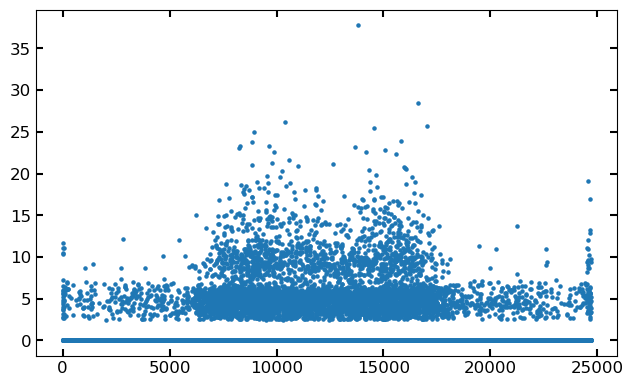

In [60]:
plt.scatter(np.arange(len(f.epix_simultaneous_laser)), f.epix_simultaneous_laser, s=5)

In [63]:
f.timing_bin_indices_simultaneous_laser

array([240, 240, 240, ...,  72,  62,  72])

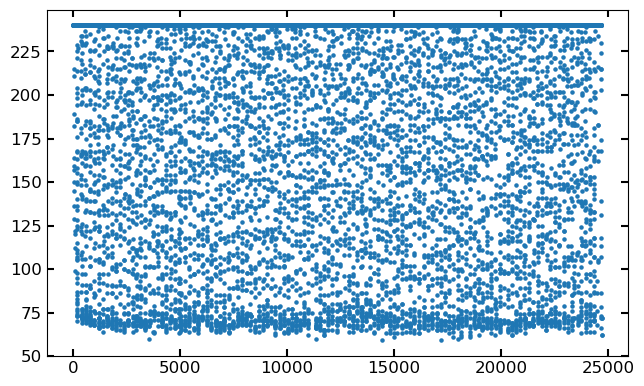

In [62]:
plt.scatter(np.arange(len(f.timing_bin_indices_simultaneous_laser)), f.timing_bin_indices_simultaneous_laser, s=5)

In [69]:
f.ccm_bin_indices_simultaneous_laser.shape

(24696,)

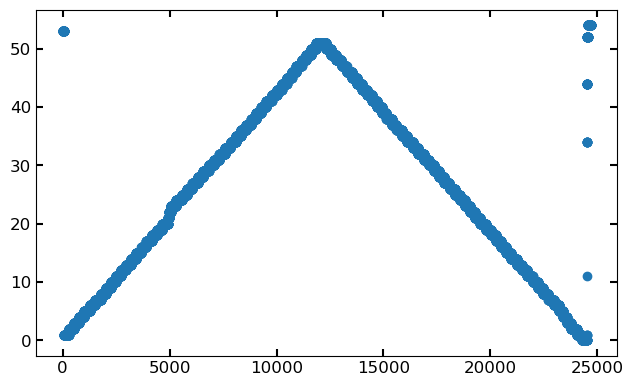

In [71]:
plt.scatter(np.arange(len(f.ccm_bin_indices_simultaneous_laser)), f.ccm_bin_indices_simultaneous_laser)

In [107]:
xas.keys

['epicsUser/dccm_E',
 'epicsUser/dccm_E_setpoint',
 'tt/ttCorr',
 'epics/lxt_ttc',
 'enc/lasDelay',
 'ipm4/sum',
 'tt/AMPL',
 'epix_2/ROI_0_sum']

In [54]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=24, hutch='xcs', experiment_id='xcs100864324')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['epicsUser/dccm_E','epicsUser/dccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)

xas.add_filter('xray','ipm',200.0)
xas.add_filter('simultaneous','ipm',500.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)

## Set normalization to use EPIX10k2M instead of ipm4
xas.scattering=True

#User specified unique ccm energie to remove glitch points
# xas.ccm_E_input = np.array([7.102 , 7.104 , 7.106 , 7.108 , 7.1083, 7.1086, 7.1089, 7.1092,
#        7.1095, 7.1098, 7.1101, 7.1104, 7.1107, 7.111 , 7.1113, 7.1116,
#        7.1119, 7.1122, 7.1125, 7.1128, 7.1131, 7.1134, 7.1137, 7.114 ,
#        7.115 , 7.116 , 7.117 , 7.118 , 7.119 , 7.12  , 7.121 , 7.122 ,
#        7.123 , 7.124 , 7.125 , 7.126 , 7.127 , 7.128 , 7.129 , 7.13  ,
#        7.132 , 7.134 , 7.136 , 7.138 , 7.14  , 7.142 , 7.144 , 7.146 ,
#        7.148 , 7.15  , 7.152 , 7.154 ])

# xas.ccm_E_input = np.array([7.102 , 7.104 , 7.106 , 7.108 , 7.1083, 7.1086, 7.1089, 7.1092,
#        7.1095, 7.1098, 7.1101, 7.1104, 7.1107, 7.111 , 7.1113, 7.1116,
#        7.1119, 7.1122, 7.1125, 7.1128, 7.1131, 7.1134, 7.1137, 7.114 ,
#        7.115 , 7.116 , 7.117 , 7.118 , 7.119 , 7.12  , 7.121 , 7.122 ,
#        7.123 , 7.124 , 7.125 , 7.126 , 7.127 , 7.128 , 7.129 , 7.13  ,
#        7.132 , 7.134 , 7.136 , 7.138 , 7.14  , 7.142 , 7.144 , 7.146 ,
#        7.148 , 7.15  , 7.152 , 7.154 ])

In [55]:
## -0.5 to 2.0 ps
#xas.run_parser(['329 330 331 332 333 334 335']) # -0.5 to 2.5 ps
#xas.run_parser(['374 375 376 377']) # -0.5 to 2.5 ps

xas.run_parser(['19']) # -0.5 to 2.5 ps

# xas.mintime = -0.5
# xas.maxtime = 2

# xas.mintime = -20
# xas.maxtime = 20

## 1 ps time bins (for -10-70ps)
#xas.numpoints = 80
# ## 2 ps time bins (for -10-70ps)
#xas.numpoints = 40
# # ## 5 ps time bins (for -10-70ps)
# xas.numpoints = 25

In [56]:
xas.primary_analysis_loop(xas_experiment, verbose = False)

In [62]:
xas.analyzed_runs[0].epix_simultaneous_laser_time_energy_binned.shape

(240, 55)

/sdf/home/j/jbabicz/./XSpecT/XSpect/XSpect_Visualization.py:144: RuntimeWarning: invalid value encountered in divide
  laser_on_spectrum=xas_analysis.summed_laser_on/xas_analysis.summed_norm_on
/sdf/home/j/jbabicz/./XSpecT/XSpect/XSpect_Visualization.py:145: RuntimeWarning: invalid value encountered in divide
  laser_off_spectrum=np.divide(np.nansum(xas_analysis.summed_laser_off,axis=0),np.nansum(xas_analysis.summed_norm_off,axis=0))


TypeError: Length of x (54) must match number of columns in z (55)

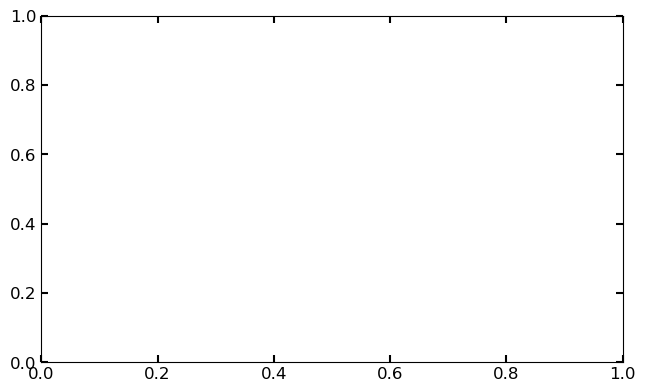

In [57]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas,
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm_simultaneous_laser_time_energy_binned',
                  norm_key='ipm_xray_not_laser_time_energy_binned')

v.plot_2d_difference_spectrum(xas, vmin=-0.2, vmax=0.2)

## Beamtime 100861524

### Myoglobin
- 4/19

In [13]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=24, hutch='xcs', experiment_id='xcs100864324')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['epicsUser/dccm_E','epicsUser/dccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)

xas.add_filter('xray','ipm',200.0)
xas.add_filter('simultaneous','ipm',500.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)


## Set normalization to use EPIX10k2M instead of ipm4
xas.scattering=True

#User specified unique ccm energie to remove glitch points
# xas.ccm_E_input = np.array([7.102 , 7.104 , 7.106 , 7.108 , 7.1083, 7.1086, 7.1089, 7.1092,
#        7.1095, 7.1098, 7.1101, 7.1104, 7.1107, 7.111 , 7.1113, 7.1116,
#        7.1119, 7.1122, 7.1125, 7.1128, 7.1131, 7.1134, 7.1137, 7.114 ,
#        7.115 , 7.116 , 7.117 , 7.118 , 7.119 , 7.12  , 7.121 , 7.122 ,
#        7.123 , 7.124 , 7.125 , 7.126 , 7.127 , 7.128 , 7.129 , 7.13  ,
#        7.132 , 7.134 , 7.136 , 7.138 , 7.14  , 7.142 , 7.144 , 7.146 ,
#        7.148 , 7.15  , 7.152 , 7.154 ])

xas.ccm_E_input = np.array([7.102 , 7.104 , 7.106 , 7.108 , 7.1083, 7.1086, 7.1089, 7.1092,
       7.1095, 7.1098, 7.1101, 7.1104, 7.1107, 7.111 , 7.1113, 7.1116,
       7.1119, 7.1122, 7.1125, 7.1128, 7.1131, 7.1134, 7.1137, 7.114 ,
       7.115 , 7.116 , 7.117 , 7.118 , 7.119 , 7.12  , 7.121 , 7.122 ,
       7.123 , 7.124 , 7.125 , 7.126 , 7.127 , 7.128 , 7.129 , 7.13  ,
       7.132 , 7.134 , 7.136 , 7.138 , 7.14  , 7.142 , 7.144 , 7.146 ,
       7.148 , 7.15  , 7.152 , 7.154 ])


## -0.5 to 2.0 ps
#xas.run_parser(['329 330 331 332 333 334 335']) # -0.5 to 2.5 ps
#xas.run_parser(['374 375 376 377']) # -0.5 to 2.5 ps

xas.run_parser(['19']) # -0.5 to 2.5 ps

# xas.mintime = -0.5
# xas.maxtime = 2

xas.mintime = -20
xas.maxtime = 20

## 1 ps time bins (for -10-70ps)
#xas.numpoints = 80
# ## 2 ps time bins (for -10-70ps)
#xas.numpoints = 40
# ## 5 ps time bins (for -10-70ps)
xas.numpoints = 25

xas.primary_analysis_loop(xas_experiment, verbose = False)
#xas.primary_analysis_loop(xas_experiment, 19)

IndexError: index 52 is out of bounds for axis 1 with size 52

In [14]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=24, hutch='xcs', experiment_id='xcs100864324')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['epicsUser/dccm_E','epicsUser/dccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)

xas.add_filter('xray','ipm',200.0)
xas.add_filter('simultaneous','ipm',500.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)


## Set normalization to use EPIX10k2M instead of ipm4
xas.scattering=True

#User specified unique ccm energie to remove glitch points
# xas.ccm_E_input = np.array([7.102 , 7.104 , 7.106 , 7.108 , 7.1083, 7.1086, 7.1089, 7.1092,
#        7.1095, 7.1098, 7.1101, 7.1104, 7.1107, 7.111 , 7.1113, 7.1116,
#        7.1119, 7.1122, 7.1125, 7.1128, 7.1131, 7.1134, 7.1137, 7.114 ,
#        7.115 , 7.116 , 7.117 , 7.118 , 7.119 , 7.12  , 7.121 , 7.122 ,
#        7.123 , 7.124 , 7.125 , 7.126 , 7.127 , 7.128 , 7.129 , 7.13  ,
#        7.132 , 7.134 , 7.136 , 7.138 , 7.14  , 7.142 , 7.144 , 7.146 ,
#        7.148 , 7.15  , 7.152 , 7.154 ])

xas.ccm_E_input = np.array([7.102 , 7.104 , 7.106 , 7.108 , 7.1083, 7.1086, 7.1089, 7.1092,
       7.1095, 7.1098, 7.1101, 7.1104, 7.1107, 7.111 , 7.1113, 7.1116,
       7.1119, 7.1122, 7.1125, 7.1128, 7.1131, 7.1134, 7.1137, 7.114 ,
       7.115 , 7.116 , 7.117 , 7.118 , 7.119 , 7.12  , 7.121 , 7.122 ,
       7.123 , 7.124 , 7.125 , 7.126 , 7.127 , 7.128 , 7.129 , 7.13  ,
       7.132 , 7.134 , 7.136 , 7.138 , 7.14  , 7.142 , 7.144 , 7.146 ,
       7.148 , 7.15  , 7.152 , 7.154 ])


## -0.5 to 2.0 ps
#xas.run_parser(['329 330 331 332 333 334 335']) # -0.5 to 2.5 ps
#xas.run_parser(['374 375 376 377']) # -0.5 to 2.5 ps

xas.run_parser(['19']) # -0.5 to 2.5 ps

# xas.mintime = -0.5
# xas.maxtime = 2

xas.mintime = -20
xas.maxtime = 20

## 1 ps time bins (for -10-70ps)
#xas.numpoints = 80
# ## 2 ps time bins (for -10-70ps)
#xas.numpoints = 40
# ## 5 ps time bins (for -10-70ps)
xas.numpoints = 25

In [16]:
f=XSpect.XSpect_Analysis.spectroscopy_run(xas_experiment,19,verbose=False)

In [17]:
f.get_run_shot_properties()

In [20]:
f.load_run_keys(keys, names)

In [21]:
f.load_sum_run_scattering('epix10k2M/azav_azav')

In [22]:
f.ipm=f.scattering[:-1]

In [ ]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas,
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm_simultaneous_laser_time_energy_binned',
                  norm_key='ipm_xray_not_laser_time_energy_binned')

v.plot_2d_difference_spectrum(xas, vmin=-0.2, vmax=0.2)